In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [75]:
mnist = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')

In [76]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


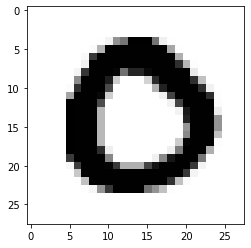

In [77]:
d1 = np.array(mnist.iloc[4, 1:])
plt.imshow(d1.reshape(28,28), cmap='Greys')

In [78]:
d1.mean(), d1.min(), d1.max(), d1.std()

(65.16964285714286, 0, 254, 104.79540585659257)

<AxesSubplot:>

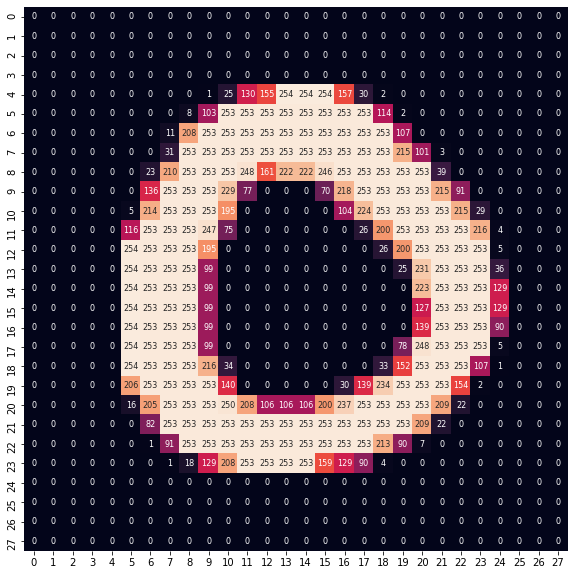

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(d1.reshape(28,28), square=True, cbar=False, annot=True, fmt='g', annot_kws={'fontsize': 8})

<BarContainer object of 68 artists>

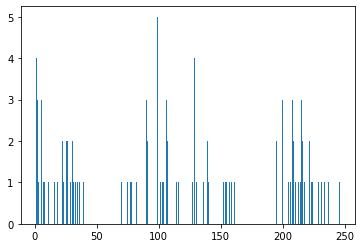

In [80]:
c, f = np.unique(d1, return_counts=True)
plt.bar(c[1:-5], f[1:-5])

<AxesSubplot:>

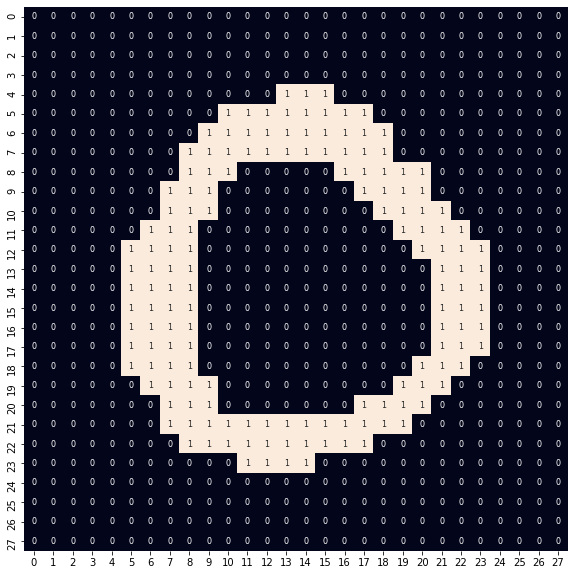

In [81]:
thres_bin = 252

digit_bw = d1.copy()

pos_over_threshold = np.where(d1 > thres_bin)
pos_below_threshold = np.where(d1 <= thres_bin)

digit_bw[pos_over_threshold] = 1
digit_bw[pos_below_threshold] = 0

plt.figure(figsize=(10,10))
sns.heatmap(digit_bw.reshape(28,28), square=True, 
    cbar=False, annot=True, fmt='g', annot_kws={'fontsize': 8})

<AxesSubplot:>

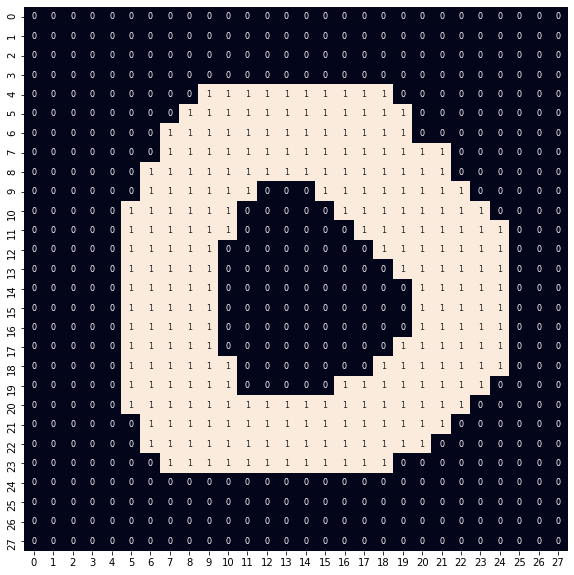

In [82]:
thres_bin = 0
digit_bw = d1.copy()

pos_over_threshold = np.where(d1 > thres_bin)
pos_below_threshold = np.where(d1 <= thres_bin)

digit_bw[pos_over_threshold] = 1
digit_bw[pos_below_threshold] = 0

plt.figure(figsize=(10,10))
sns.heatmap(digit_bw.reshape(28,28), square=True, 
    cbar=False, annot=True, fmt='g', annot_kws={'fontsize': 8})

In [83]:
digit_bw.mean(), digit_bw.min(), digit_bw.max(), digit_bw.std()

(0.33163265306122447, 0, 1, 0.4707997838623102)

<BarContainer object of 2 artists>

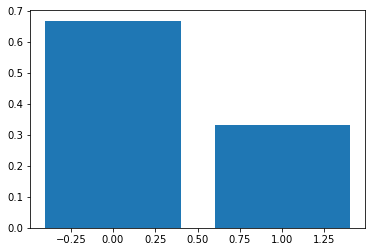

In [84]:
c, f = np.unique(digit_bw, return_counts=True)
plt.bar(c, f/sum(f))

In [85]:
mnist_array = np.array(mnist.iloc[:, 1:])
pos_not_zero = np.where(mnist_array)
pos_not_zero

(array([    0,     0,     0, ..., 41999, 41999, 41999]),
 array([132, 133, 134, ..., 715, 716, 717]))

In [86]:
mnist_array[pos_not_zero] = 1
mnist_array.mean(), mnist_array.min(), mnist_array.max(), mnist_array.std()

(0.19152964042759962, 0, 1, 0.39350481225173833)

In [87]:
for i in range(10):
    digits = mnist[mnist['label'] == i]  # filter data
    mnist_array = np.array(digits.iloc[:, 1:])  # filtered data to array
    pos_not_zero = np.where(mnist_array)  # binarization
    mnist_array[pos_not_zero] = 1
    print(i, len(mnist_array), mnist_array.mean(), mnist_array.min(), 
        mnist_array.max(), mnist_array.std())



0 4132 0.24457012960072702 0 1 0.4298320384845817
1 4684 0.10935212577772356 0 1 0.31208049981634
2 4177 0.2155203055605771 0 1 0.4111828102579836
3 4351 0.20857127613168916 0 1 0.40628721233197496
4 4072 0.18048406739906178 0 1 0.38459013093701766
5 3795 0.19484115780699632 0 1 0.39607837738435725
6 4137 0.2017985403008194 0 1 0.40134260854446846
7 4401 0.16762887840889593 0 1 0.3735363938524216
8 4063 0.22190487073490484 0 1 0.4155274949735933
9 4188 0.18271866411320975 0 1 0.3864357047399917


In [88]:
p = 0.24457
np.sqrt(p * (1-p))

0.42983196146866515

In [89]:
i = 0
digits = mnist[mnist['label'] == i]  # filter data
mnist_array_0 = np.array(digits.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_0)  # binarization
mnist_array_0[pos_not_zero] = 1
print(i, len(mnist_array), mnist_array_0.mean(), mnist_array_0.min(), 
    mnist_array_0.max(), mnist_array_0.std())

i = 1
digits = mnist[mnist['label'] == i]  # filter data
mnist_array_1 = np.array(digits.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_1)  # binarization
mnist_array_1[pos_not_zero] = 1
print(i, len(mnist_array_1), mnist_array_1.mean(), mnist_array.min(), 
    mnist_array_1.max(), mnist_array_1.std())

0 4188 0.24457012960072702 0 1 0.4298320384845817
1 4684 0.10935212577772356 0 1 0.31208049981634


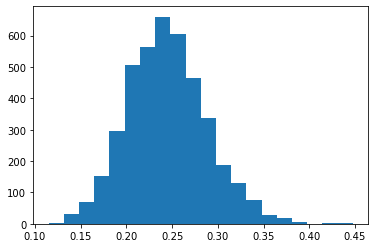

In [90]:
mean_zero_digits = mnist_array_0.mean(axis=1)
h = plt.hist(mean_zero_digits, bins=20)

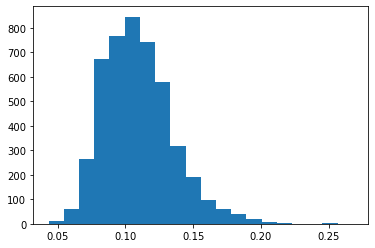

In [91]:
mean_one_digits = mnist_array_1.mean(axis=1)
h = plt.hist(mean_one_digits, bins=20)

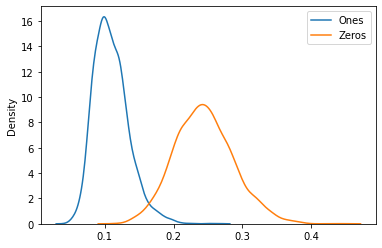

In [92]:
fig, ax = plt.subplots()
sns.kdeplot(mean_one_digits, ax=ax, label='Ones')
sns.kdeplot(mean_zero_digits, ax=ax, label='Zeros')
plt.legend()

In [93]:
mean_one_digits.var(), mean_zero_digits.var(), len(mean_one_digits), len(mean_zero_digits)

(0.0006513160895784615, 0.0018475720728919588, 4684, 4132)

(1, 0)

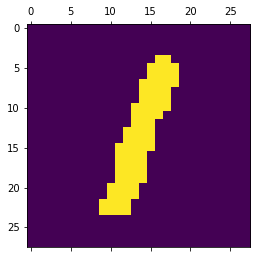

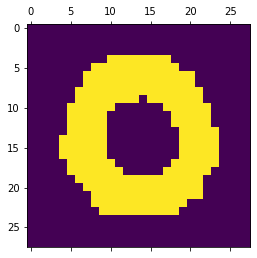

In [94]:
plt.matshow(mnist_array_1[12].reshape(28,28))
plt.matshow(mnist_array_0[0].reshape(28,28))
class_th = 0.165 # activity (mean) threshold
int(mnist_array_1[0].mean() < class_th), int(mnist_array_0[0].mean() < class_th)

In [95]:
d1 = mnist_array_1[12]
d0 = mnist_array_0[0]

In [96]:
d1.mean(), d0.mean()

(0.10204081632653061, 0.3125)

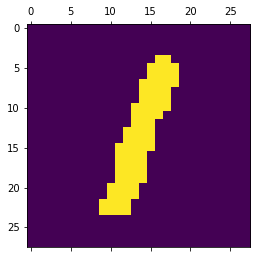

In [97]:
d1_2d = d1.reshape(28,28)
plt.matshow(d1_2d)

In [98]:
d1_c = d1_2d.sum(axis=0)
d1_f = d1_2d.sum(axis=1)

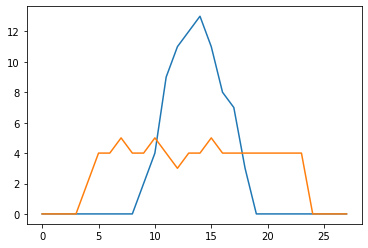

In [99]:
plt.plot(range(28), d1_c)
plt.plot(range(28), d1_f)

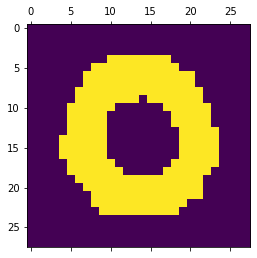

In [100]:
d0_2d = d0.reshape(28,28)
plt.matshow(d0_2d)

In [101]:
d0_c = d0_2d.sum(axis=0)
d0_f = d0_2d.sum(axis=1)

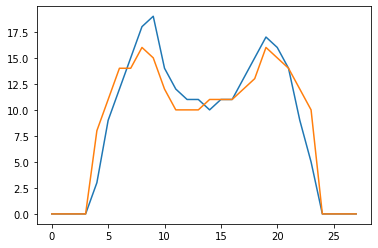

In [102]:
plt.plot(range(28), d0_c)
plt.plot(range(28), d0_f)

In [103]:
28*28, 'vs', len(d0_c) + len(d0_f)

(784, 'vs', 56)

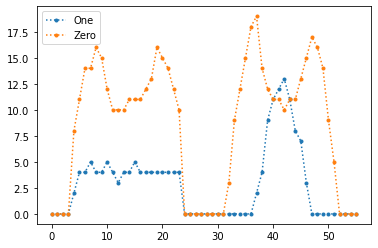

In [104]:
plt.plot(np.concatenate((d1_f,d1_c)), ':.', label='One')
plt.plot(np.concatenate((d0_f,d0_c)), ':.', label='Zero')
plt.legend()

In [105]:
from scipy import ndimage

<AxesSubplot:>

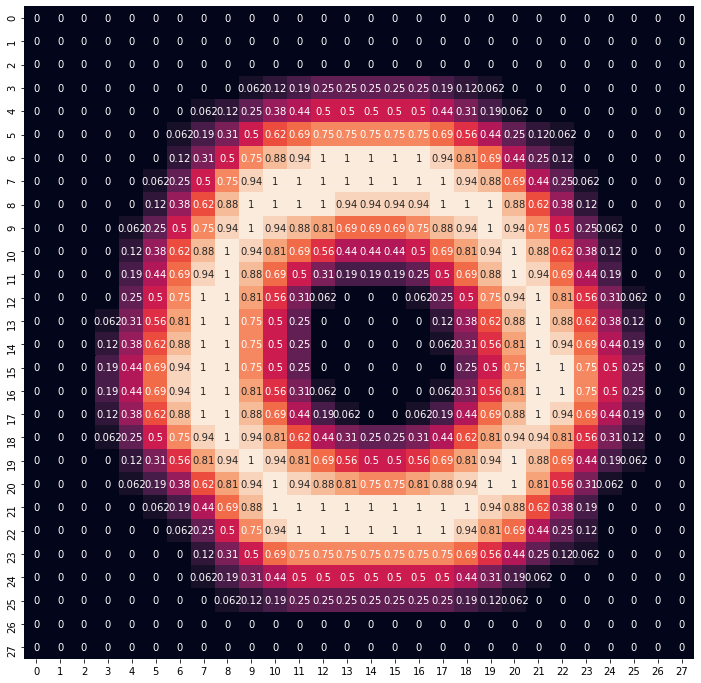

In [106]:
size = 6

d0_2dh = ndimage.uniform_filter(d0.reshape(28,28), output='float', size=size)

plt.figure(figsize=(12,12))
sns.heatmap(d0_2dh, annot=True, cbar=False)

<AxesSubplot:>

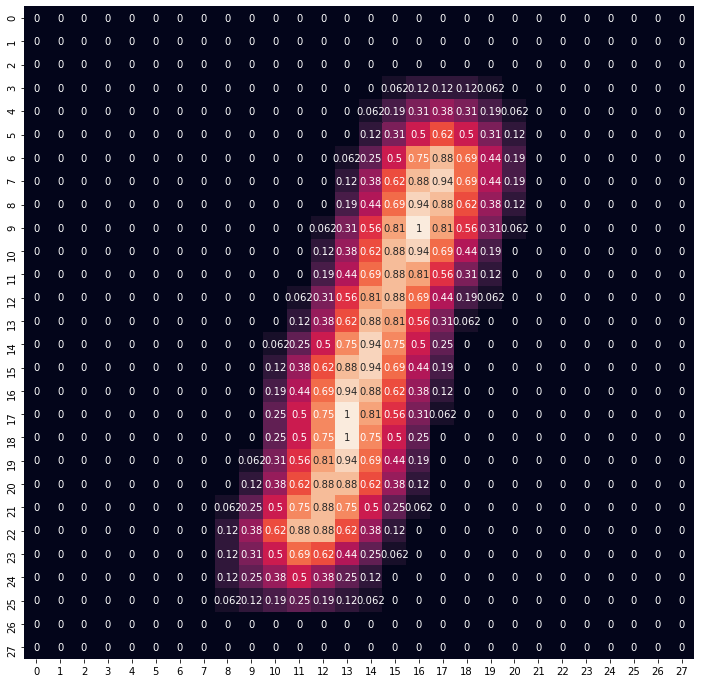

In [108]:
plt.figure(figsize=(12,12))
d1_2dh = ndimage.uniform_filter(d1.reshape(28,28), output='float', size=size)
sns.heatmap(d1_2dh, annot=True, cbar=False)

<AxesSubplot:>

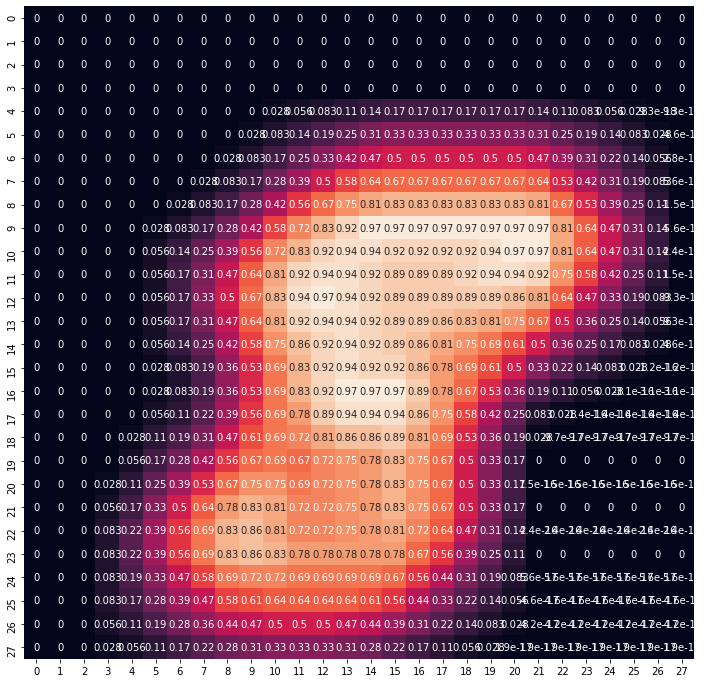

In [109]:
size = 6
digits_8 = mnist[mnist['label'] == 8]

mnist_array_8 = np.array(digits_8.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_8)  # binarization
mnist_array_8[pos_not_zero] = 1

d8 = mnist_array_8[0]

plt.figure(figsize=(12,12))
d8_2dh = ndimage.uniform_filter(d8.reshape(28,28), output='float', size=size)
sns.heatmap(d8_2dh, annot=True, cbar=False)

<AxesSubplot:>

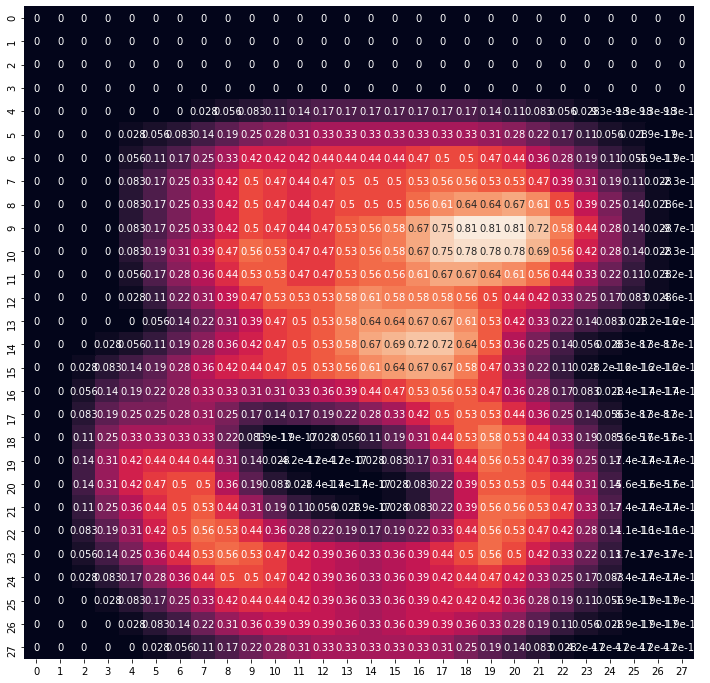

In [116]:
size = 6
digits_3 = mnist[mnist['label'] == 3]

mnist_array_3 = np.array(digits_3.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_3)  # binarization
mnist_array_3[pos_not_zero] = 1

d3 = mnist_array_3[0]

plt.figure(figsize=(12,12))
d3_2dh = ndimage.uniform_filter(d3.reshape(28,28), output='float', size=size)
sns.heatmap(d3_2dh, annot=True, cbar=False)

<AxesSubplot:>

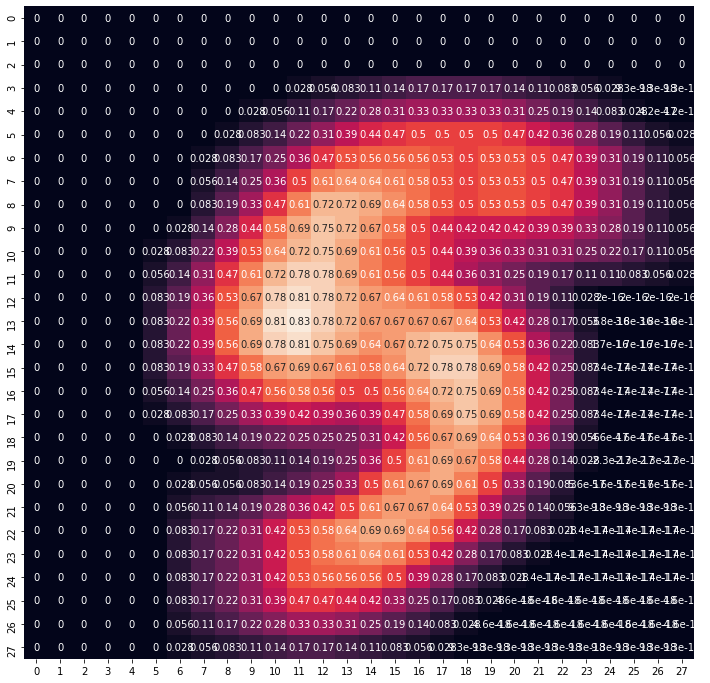

In [111]:
size = 6
digits_5 = mnist[mnist['label'] == 5]

mnist_array_5 = np.array(digits_5.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_5)  # binarization
mnist_array_5[pos_not_zero] = 1

d5 = mnist_array_5[0]

plt.figure(figsize=(12,12))
d5_2dh = ndimage.uniform_filter(d5.reshape(28,28), output='float', size=size)
sns.heatmap(d5_2dh, annot=True, cbar=False)

<AxesSubplot:>

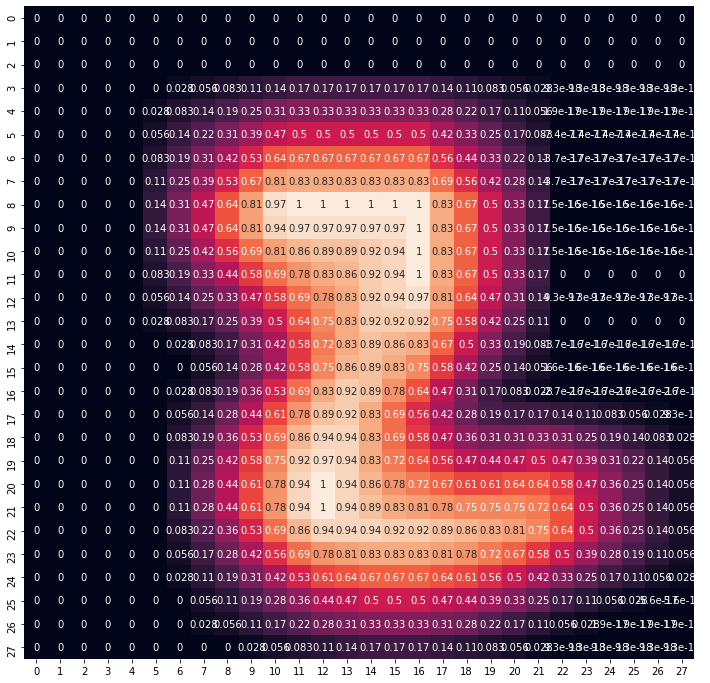

In [127]:
size = 6
digits_2 = mnist[mnist['label'] == 2]

mnist_array_2 = np.array(digits_2.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_2)  # binarization
mnist_array_2[pos_not_zero] = 1

d2 = mnist_array_2[0]

plt.figure(figsize=(12,12))
d2_2dh = ndimage.uniform_filter(d2.reshape(28,28), output='float', size=size)
sns.heatmap(d2_2dh, annot=True, cbar=False)

<AxesSubplot:>

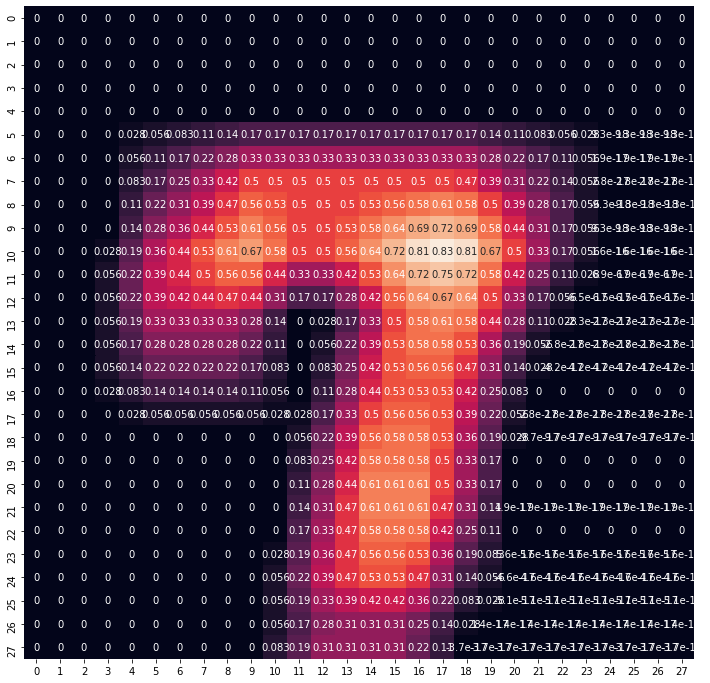

In [119]:
size = 6
digits_7 = mnist[mnist['label'] == 7]

mnist_array_7 = np.array(digits_7.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_7)  # binarization
mnist_array_7[pos_not_zero] = 1

d7 = mnist_array_7[0]

plt.figure(figsize=(12,12))
d7_2dh = ndimage.uniform_filter(d7.reshape(28,28), output='float', size=size)
sns.heatmap(d7_2dh, annot=True, cbar=False)

<AxesSubplot:>

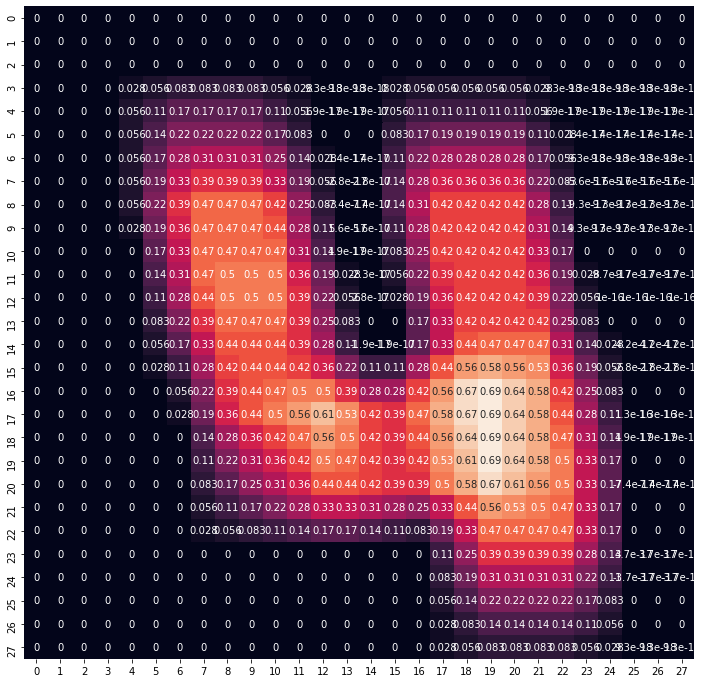

In [130]:
size = 6
digits_4 = mnist[mnist['label'] == 4]

mnist_array_4 = np.array(digits_4.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_4)  # binarization
mnist_array_4[pos_not_zero] = 1

d4 = mnist_array_4[0]

plt.figure(figsize=(12,12))
d4_2dh = ndimage.uniform_filter(d4.reshape(28,28), output='float', size=size)
sns.heatmap(d4_2dh, annot=True, cbar=False)

<AxesSubplot:>

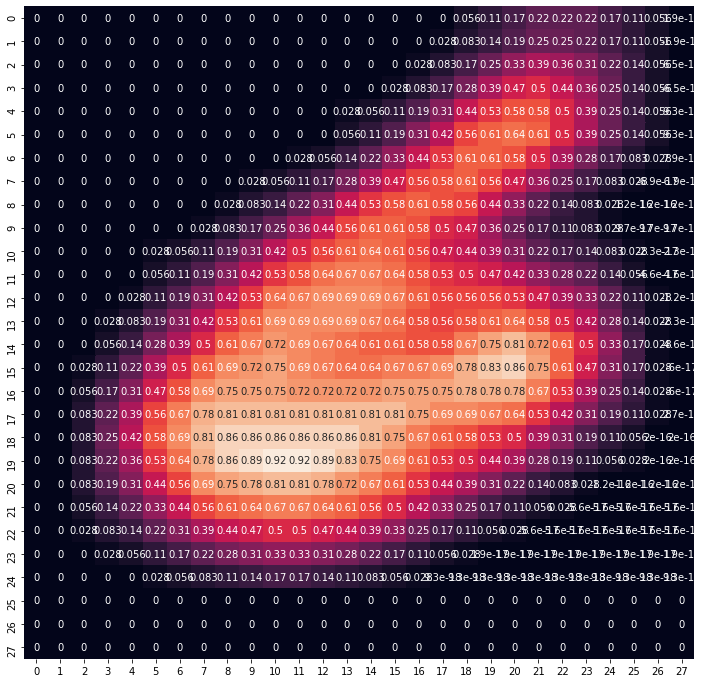

In [133]:
size = 6
digits_6 = mnist[mnist['label'] == 6]

mnist_array_6 = np.array(digits_6.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_6)  # binarization
mnist_array_6[pos_not_zero] = 1

d6 = mnist_array_6[0]

plt.figure(figsize=(12,12))
d6_2dh = ndimage.uniform_filter(d6.reshape(28,28), output='float', size=size)
sns.heatmap(d6_2dh, annot=True, cbar=False)

<AxesSubplot:>

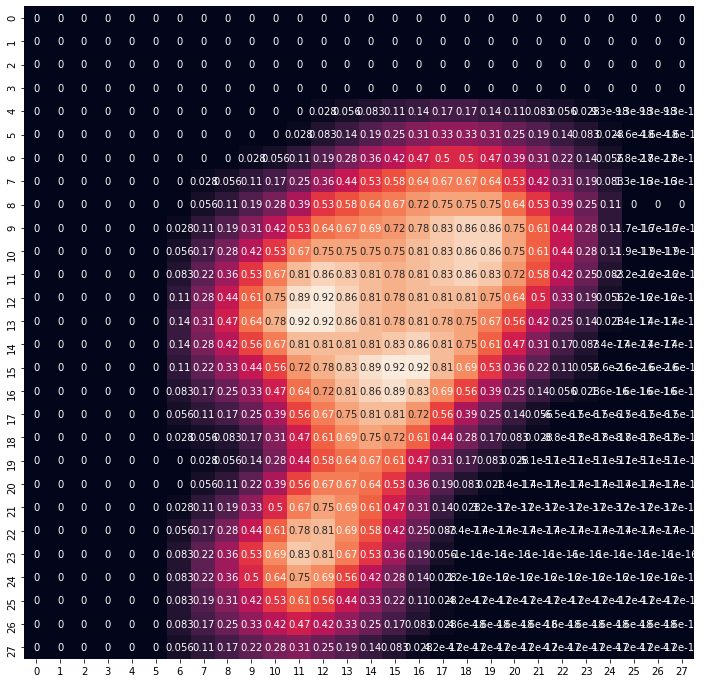

In [137]:
size = 6
digits_9 = mnist[mnist['label'] == 9]

mnist_array_9 = np.array(digits_9.iloc[:, 1:])  # filtered data to array
pos_not_zero = np.where(mnist_array_9)  # binarization
mnist_array_9[pos_not_zero] = 1

d9 = mnist_array_9[0]

plt.figure(figsize=(12,12))
d9_2dh = ndimage.uniform_filter(d9.reshape(28,28), output='float', size=size)
sns.heatmap(d9_2dh, annot=True, cbar=False)

1176

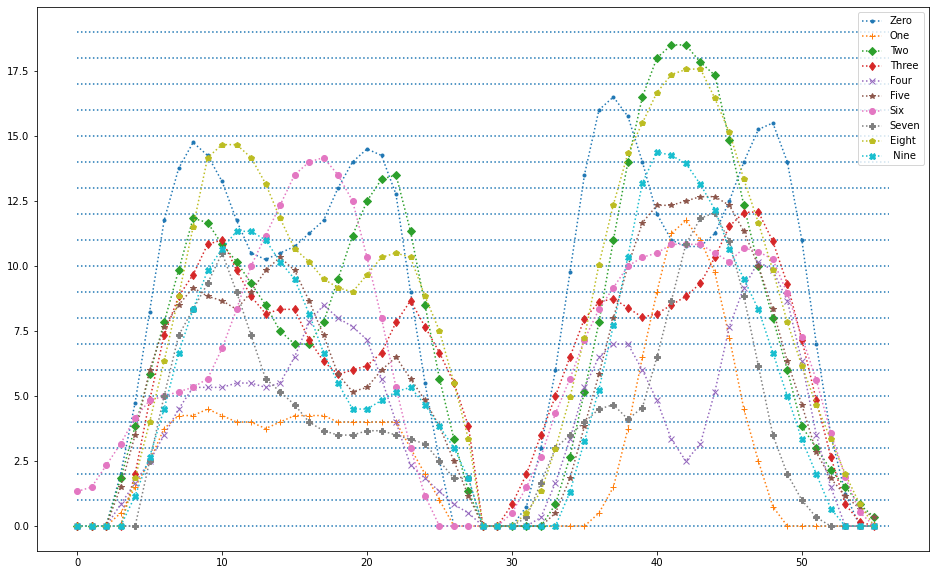

In [181]:
d0_c = d0_2dh.sum(axis=0)
d0_f = d0_2dh.sum(axis=1)

d1_c = d1_2dh.sum(axis=0)
d1_f = d1_2dh.sum(axis=1)

d2_c = d2_2dh.sum(axis=0)
d2_f = d2_2dh.sum(axis=1)

d3_c = d3_2dh.sum(axis=0)
d3_f = d3_2dh.sum(axis=1)

d4_c = d4_2dh.sum(axis=0)
d4_f = d4_2dh.sum(axis=1)

d5_c = d5_2dh.sum(axis=0)
d5_f = d5_2dh.sum(axis=1)

d6_c = d6_2dh.sum(axis=0)
d6_f = d6_2dh.sum(axis=1)

d7_c = d7_2dh.sum(axis=0)
d7_f = d7_2dh.sum(axis=1)

d8_c = d8_2dh.sum(axis=0)
d8_f = d8_2dh.sum(axis=1)

d9_c = d9_2dh.sum(axis=0)
d9_f = d9_2dh.sum(axis=1)

c0 = np.concatenate((d0_f,d0_c))
c1 = np.concatenate((d1_f,d1_c))
c2 = np.concatenate((d2_f,d2_c))
c3 = np.concatenate((d3_f,d3_c))
c4 = np.concatenate((d4_f,d4_c))
c5 = np.concatenate((d5_f,d5_c))
c6 = np.concatenate((d6_f,d6_c))
c7 = np.concatenate((d7_f,d7_c))
c8 = np.concatenate((d8_f,d8_c))
c9 = np.concatenate((d9_f,d9_c))

plt.figure(figsize=(16,10))
plt.plot(c0, ':.', label='Zero')
plt.plot(c1, ':+', label='One')
plt.plot(c2, ':D', label='Two')
plt.plot(c3, ':d', label='Three')
plt.plot(c4, ':x', label='Four')
plt.plot(c5, ':*', label='Five')
plt.plot(c6, ':o', label='Six')
plt.plot(c7, ':P', label='Seven')
plt.plot(c8, ':p', label='Eight')
plt.plot(c9, ':X', label=' Nine')
hl = range(0,20,1)
plt.hlines(hl, [0]*len(hl), [56]*len(hl), linestyles="dotted")
plt.legend()
56*21

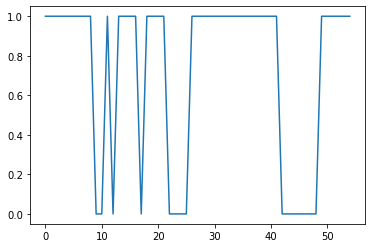

In [190]:
plt.plot(((c1[:-1] <= c1[1:])*1))

0.5491071428571429
0.8464285714285714
0.60625
0.6660714285714285
0.775
0.6883928571428571
0.6508928571428572
0.7785714285714286
0.5696428571428571
0.7044642857142858


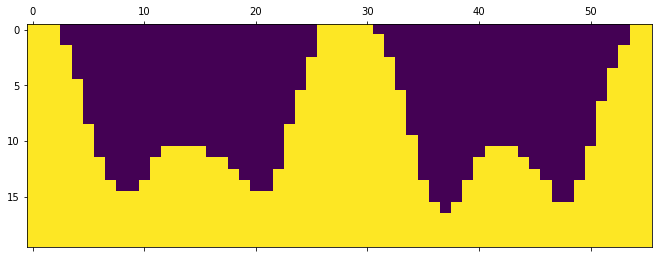

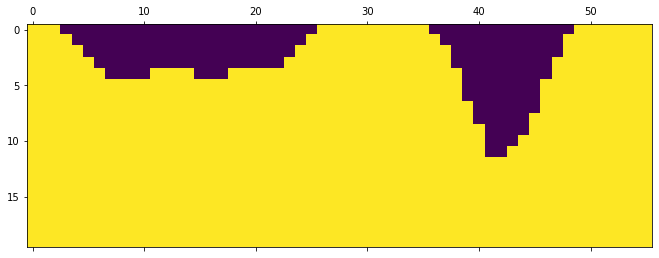

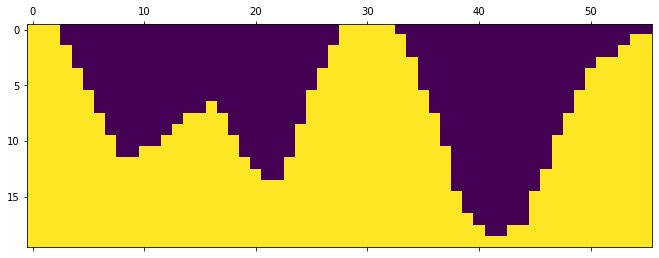

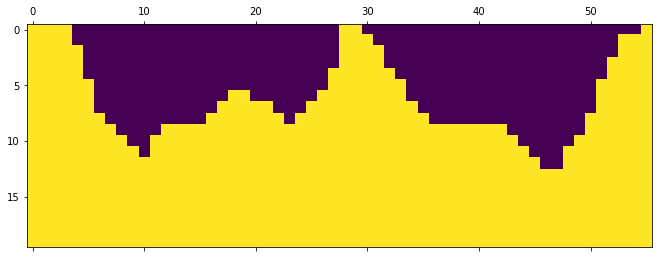

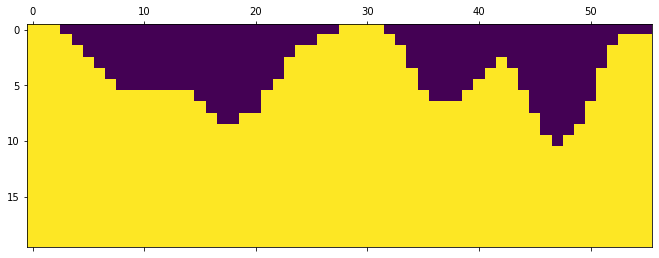

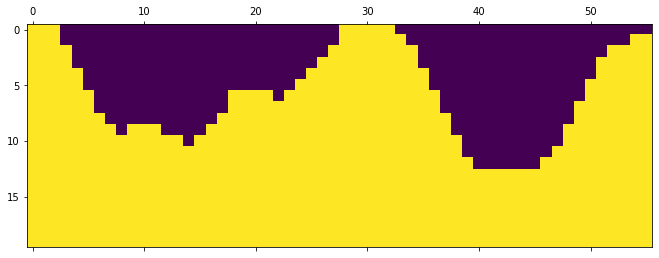

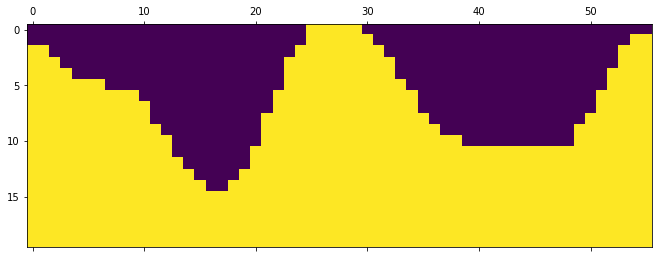

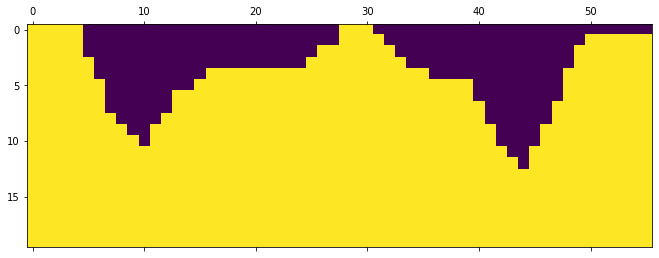

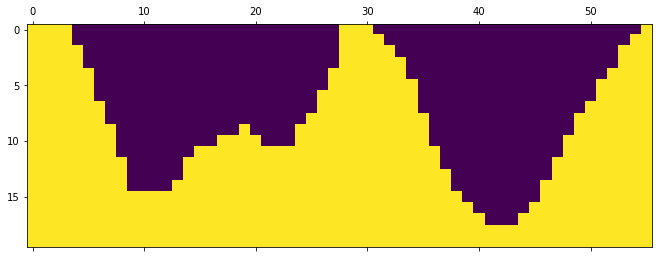

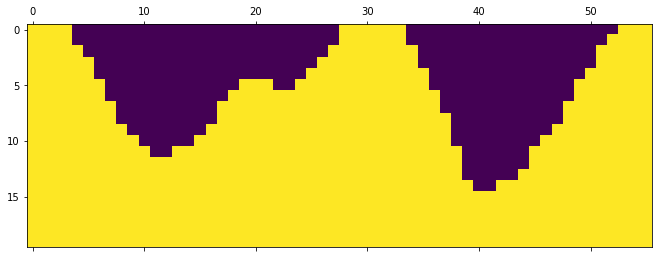

In [182]:
cbins = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]

for ci in cbins:
    cbin = np.zeros((len(hl),56), dtype='int')
    for i, hli in enumerate(hl):
        cbin[i, np.where(ci <= hli)[0]] = 1

    plt.matshow(cbin)
    print(cbin.mean())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>